In [31]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
dataset = pd.read_csv('Obesity_Data_Set.csv')

In [35]:
dataset.shape

(2111, 17)

In [131]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [135]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


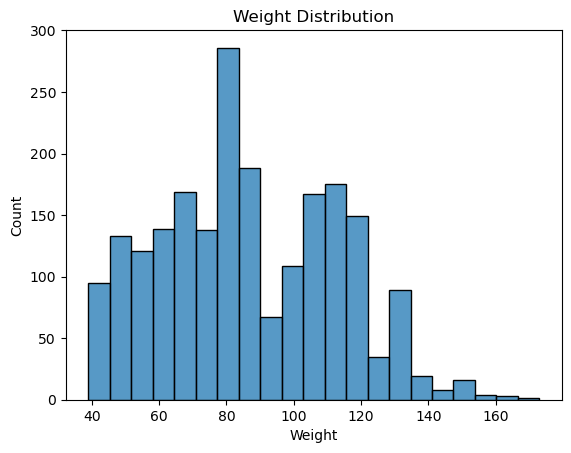

In [137]:
sns.histplot(dataset.Weight)
plt.title('Weight Distribution')
plt.show()

In [139]:
dataset['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

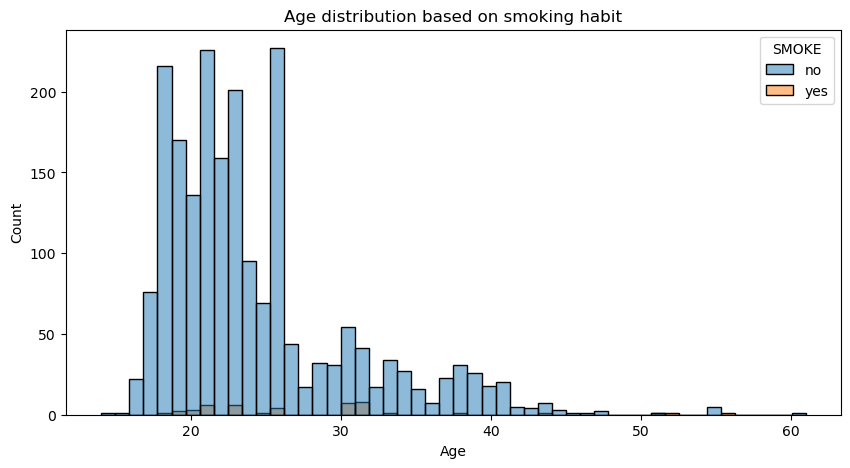

In [141]:
plt.figure(figsize = (10 , 5))
plt.title('Age distribution based on smoking habit')
sns.histplot(x = 'Age' , hue = 'SMOKE' , data = dataset)
plt.show()

In [143]:
dataset['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

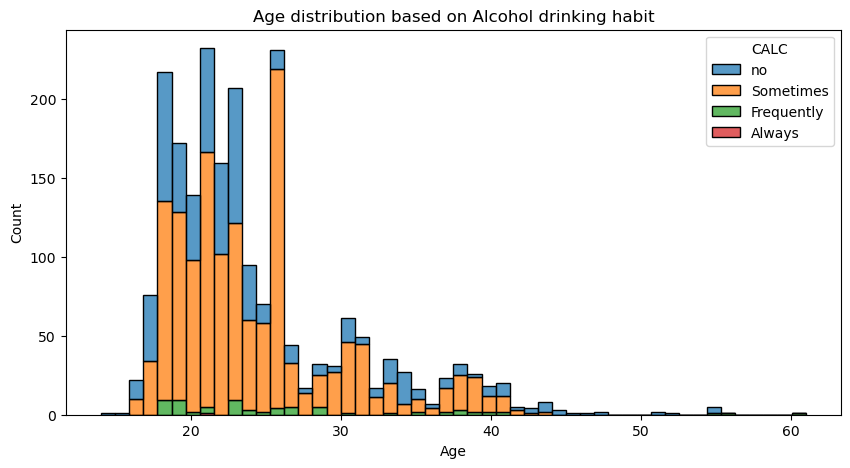

In [145]:
plt.figure(figsize = (10 , 5))
plt.title('Age distribution based on Alcohol drinking habit')
sns.histplot(x = 'Age' , hue = 'CALC' , data = dataset,multiple="stack")
plt.show()

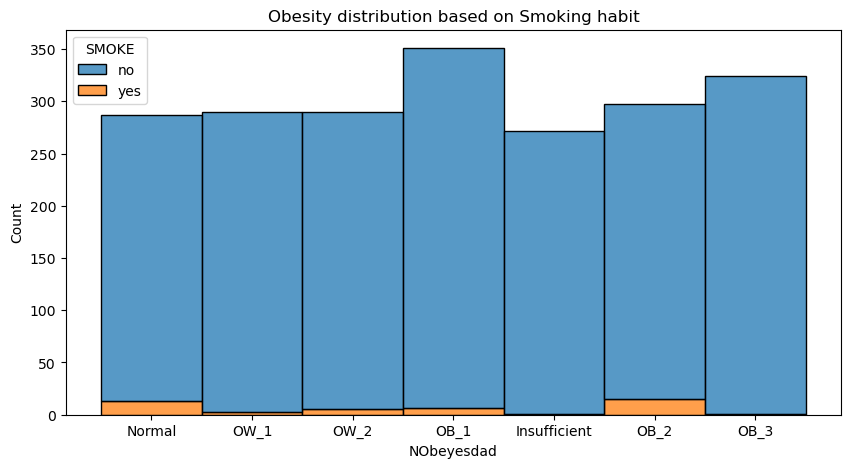

In [147]:
plt.figure(figsize = (10 , 5))
plt.title('Obesity distribution based on Smoking habit')
graph = sns.histplot(x = 'NObeyesdad' , hue = 'SMOKE' , data = dataset,multiple="stack")
graph.set_xticks([0,1,2,3,4,5,6])
graph.set_xticklabels(['Normal', 'OW_1', 'OW_2', 'OB_1','Insufficient','OB_2','OB_3'])
plt.show()

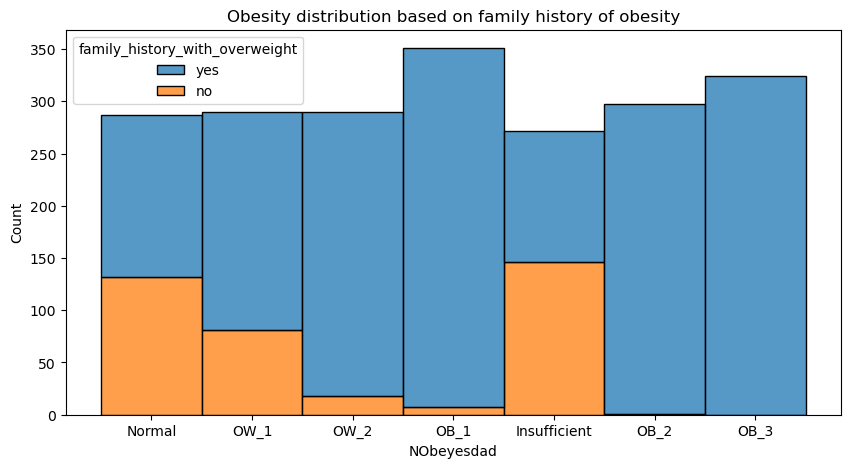

In [149]:
plt.figure(figsize = (10 , 5))
plt.title('Obesity distribution based on family history of obesity')
graph = sns.histplot(x = 'NObeyesdad' , hue = 'family_history_with_overweight' , data = dataset,multiple="stack")
graph.set_xticks([0,1,2,3,4,5,6])
graph.set_xticklabels(['Normal', 'OW_1', 'OW_2', 'OB_1','Insufficient','OB_2','OB_3'])
plt.show()

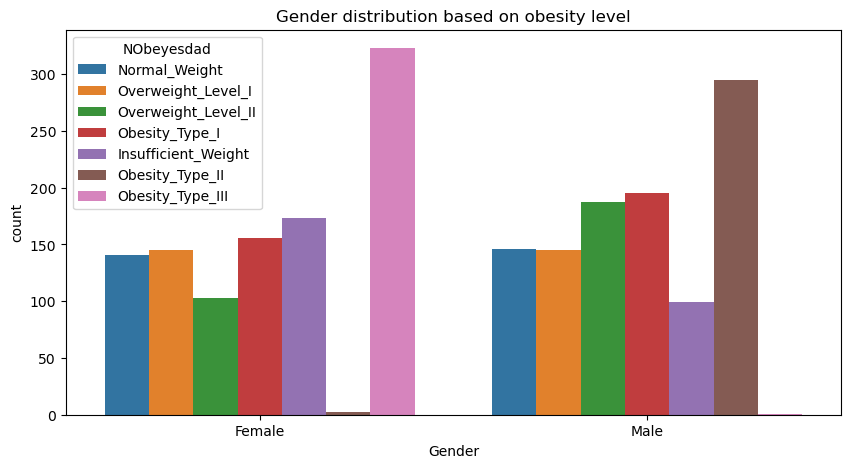

In [151]:
plt.figure(figsize = (10 , 5))
plt.title('Gender distribution based on obesity level')
sns.countplot(x = 'Gender' , hue = 'NObeyesdad' , data = dataset)
plt.show()

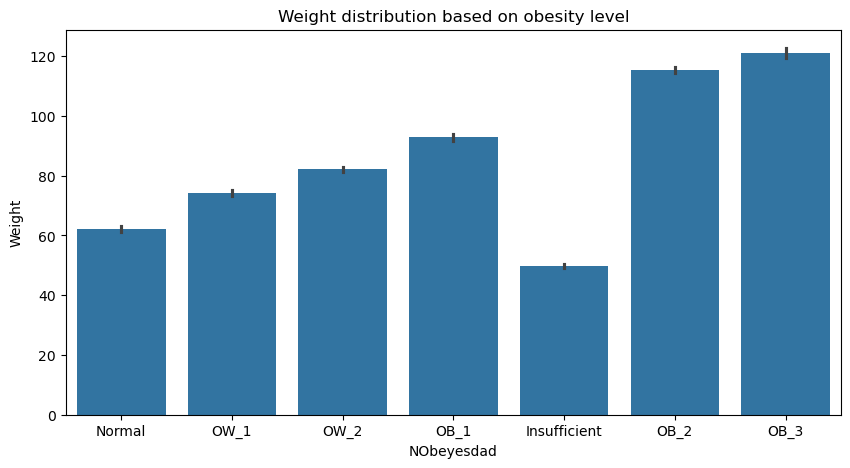

In [153]:
plt.figure(figsize = (10 , 5))
plt.title('Weight distribution based on obesity level')
graph = sns.barplot(x = 'NObeyesdad' , y = 'Weight' , data = dataset)
graph.set_xticks([0,1,2,3,4,5,6])
graph.set_xticklabels(['Normal', 'OW_1', 'OW_2', 'OB_1','Insufficient','OB_2','OB_3'])
plt.show()

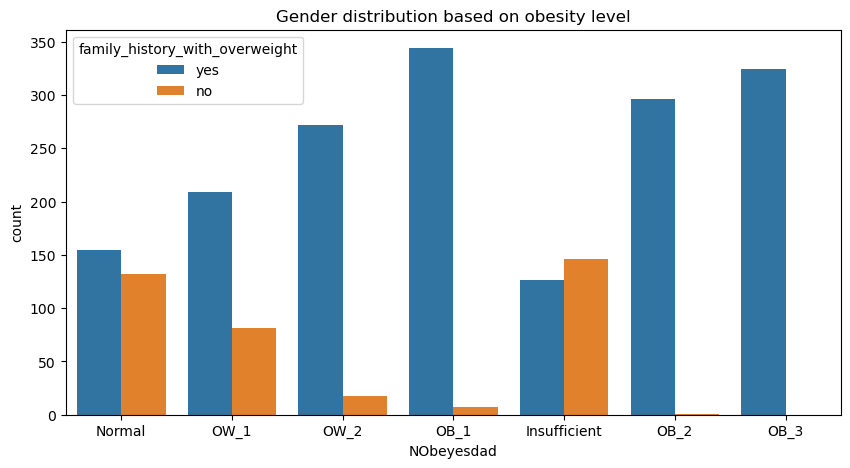

In [155]:
plt.figure(figsize = (10 , 5))
plt.title('Gender distribution based on obesity level')
graph = sns.countplot(x = 'NObeyesdad' , hue = 'family_history_with_overweight' , data = dataset)
graph.set_xticks([0,1,2,3,4,5,6])
graph.set_xticklabels(['Normal', 'OW_1', 'OW_2', 'OB_1','Insufficient','OB_2','OB_3'])
plt.show()

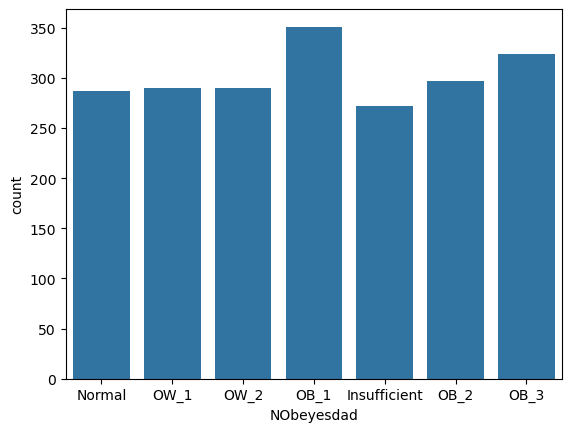

In [157]:
graph = sns.countplot(dataset, x = 'NObeyesdad')
graph.set_xticks([0,1,2,3,4,5,6])
graph.set_xticklabels(['Normal', 'OW_1', 'OW_2', 'OB_1','Insufficient','OB_2','OB_3'])
plt.show()

In [159]:
# checking for class imbalance
dataset['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [161]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [163]:
dataset.iloc[:,0].unique()

array(['Female', 'Male'], dtype=object)

In [165]:
dataset.iloc[:,16].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [167]:
dataset.iloc[:,14].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [169]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [171]:
from sklearn import preprocessing 

In [173]:
enc = preprocessing.OrdinalEncoder()

In [175]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [177]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [89]:
dataset['NObeyesdad'] = enc.fit_transform(dataset['NObeyesdad'].values.reshape(-1,1))
dataset['SMOKE'] = enc.fit_transform(dataset['SMOKE'].values.reshape(-1,1))
dataset['Gender'] = enc.fit_transform(dataset['Gender'].values.reshape(-1,1))
dataset['FAVC'] = enc.fit_transform(dataset['FAVC'].values.reshape(-1,1))
dataset['CAEC'] = enc.fit_transform(dataset['CAEC'].values.reshape(-1,1))
dataset['SCC'] = enc.fit_transform(dataset['SCC'].values.reshape(-1,1))
dataset['CALC'] = enc.fit_transform(dataset['CALC'].values.reshape(-1,1))
dataset['MTRANS'] = enc.fit_transform(dataset['MTRANS'].values.reshape(-1,1))
dataset['family_history_with_overweight'] = enc.fit_transform(dataset['family_history_with_overweight'].values.reshape(-1,1))

In [91]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,5.0
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6.0


In [25]:
dataset['NObeyesdad'].value_counts()

NObeyesdad
2.0    351
4.0    324
3.0    297
5.0    290
6.0    290
1.0    287
0.0    272
Name: count, dtype: int64

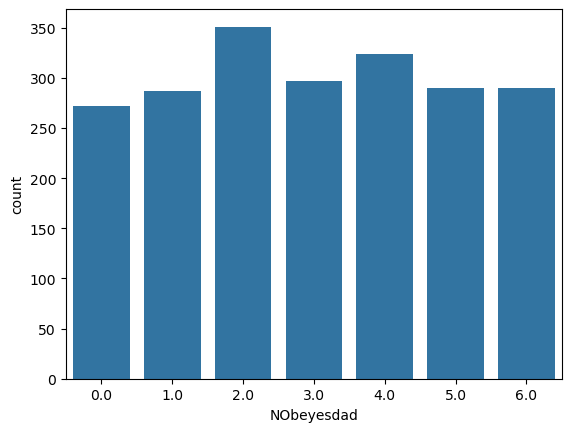

In [63]:
sns.countplot(dataset, x = 'NObeyesdad')
plt.show()

In [95]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
Y = dataset.iloc[:,16].values

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size = 0.3, random_state = 0)

In [99]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 16 features remain


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' , p=2)
classifier.fit(X_train_s, Y_train)

KNeighborsClassifier()

In [107]:
y_pred = classifier.predict(X_test_s)
print(y_pred)

[3. 2. 5. 4. 4. 3. 0. 4. 2. 3. 4. 2. 5. 2. 1. 2. 0. 4. 5. 2. 4. 2. 2. 0.
 2. 3. 4. 6. 1. 3. 5. 6. 6. 0. 3. 5. 6. 0. 5. 6. 5. 6. 0. 5. 4. 3. 2. 0.
 4. 0. 5. 3. 3. 5. 6. 2. 2. 5. 3. 6. 2. 1. 4. 0. 0. 3. 5. 5. 5. 2. 3. 4.
 3. 2. 2. 2. 2. 2. 3. 0. 6. 5. 2. 1. 5. 0. 1. 3. 4. 3. 5. 1. 0. 3. 6. 4.
 2. 3. 3. 3. 1. 2. 0. 2. 4. 2. 6. 4. 5. 6. 0. 1. 2. 0. 2. 2. 2. 2. 3. 0.
 2. 4. 0. 1. 4. 2. 1. 2. 6. 5. 0. 1. 1. 2. 3. 4. 5. 3. 4. 3. 6. 6. 2. 0.
 0. 6. 2. 6. 2. 0. 6. 5. 4. 4. 4. 2. 6. 1. 3. 5. 2. 4. 6. 4. 0. 0. 3. 2.
 5. 4. 5. 3. 4. 5. 5. 3. 2. 0. 0. 3. 5. 2. 4. 4. 4. 0. 5. 5. 3. 4. 2. 6.
 3. 6. 0. 4. 3. 3. 2. 1. 0. 0. 5. 5. 2. 6. 2. 2. 2. 0. 5. 1. 1. 3. 3. 6.
 5. 4. 6. 4. 3. 2. 1. 0. 4. 4. 1. 6. 2. 0. 4. 4. 5. 4. 0. 3. 1. 2. 2. 4.
 2. 0. 4. 4. 6. 5. 0. 4. 6. 6. 1. 5. 6. 4. 1. 4. 0. 4. 2. 1. 4. 0. 1. 1.
 0. 2. 3. 0. 1. 4. 2. 2. 4. 1. 2. 3. 1. 2. 0. 2. 2. 0. 0. 0. 0. 5. 2. 4.
 5. 4. 4. 3. 1. 4. 4. 5. 1. 1. 4. 4. 0. 5. 1. 0. 3. 4. 5. 0. 0. 0. 5. 0.
 2. 0. 3. 3. 4. 0. 0. 1. 3. 2. 4. 1. 4. 2. 2. 0. 0.

In [109]:
print(Y_test)

[3. 2. 5. 4. 4. 3. 0. 4. 2. 3. 4. 2. 5. 2. 1. 2. 1. 4. 6. 6. 4. 2. 2. 6.
 2. 3. 4. 6. 5. 3. 5. 6. 6. 2. 3. 5. 6. 0. 5. 0. 5. 6. 0. 5. 4. 3. 2. 0.
 4. 0. 5. 3. 3. 5. 2. 2. 5. 5. 3. 1. 2. 1. 2. 0. 0. 3. 1. 5. 5. 2. 6. 4.
 3. 2. 2. 1. 2. 5. 3. 0. 6. 5. 2. 5. 6. 1. 1. 3. 4. 3. 5. 0. 0. 3. 6. 4.
 2. 3. 3. 3. 0. 2. 0. 5. 4. 2. 6. 4. 5. 6. 0. 5. 2. 1. 2. 6. 2. 2. 6. 0.
 2. 4. 0. 1. 4. 6. 2. 5. 6. 5. 1. 0. 1. 2. 6. 4. 5. 3. 4. 3. 6. 6. 1. 0.
 0. 1. 6. 6. 2. 0. 6. 5. 4. 4. 4. 2. 2. 1. 3. 5. 2. 4. 6. 4. 0. 0. 3. 2.
 5. 4. 5. 3. 4. 1. 5. 3. 2. 0. 1. 3. 5. 2. 4. 4. 4. 0. 5. 5. 3. 4. 2. 6.
 3. 6. 1. 4. 3. 3. 2. 5. 1. 0. 5. 5. 2. 6. 2. 2. 2. 0. 5. 1. 1. 3. 3. 6.
 5. 4. 6. 4. 3. 2. 1. 0. 4. 4. 1. 6. 5. 0. 4. 4. 5. 4. 0. 3. 1. 5. 2. 4.
 2. 0. 4. 4. 1. 1. 0. 4. 6. 6. 2. 5. 6. 4. 1. 4. 0. 4. 2. 1. 4. 1. 1. 1.
 0. 2. 3. 0. 1. 4. 6. 2. 4. 1. 6. 2. 1. 1. 1. 6. 2. 1. 0. 1. 6. 5. 2. 4.
 6. 4. 4. 3. 1. 4. 4. 5. 1. 1. 4. 4. 0. 1. 1. 0. 6. 4. 5. 0. 0. 0. 5. 0.
 2. 0. 3. 3. 4. 0. 1. 0. 3. 2. 4. 6. 4. 6. 2. 0. 0.

In [111]:
from sklearn import metrics

In [113]:
acc = metrics.accuracy_score(Y_test,y_pred)

In [115]:
acc

0.8138801261829653

In [117]:
cm = metrics.confusion_matrix(Y_test,y_pred)

In [119]:
cm

array([[ 84,   5,   0,   0,   0,   0,   1],
       [ 26,  39,   5,   0,   0,   9,   8],
       [  1,   3,  89,   2,   2,   0,   6],
       [  0,   0,   1,  89,   0,   0,   0],
       [  0,   0,   0,   1, 100,   0,   0],
       [  3,   7,   9,   1,   0,  59,   2],
       [  2,   4,  11,   4,   0,   5,  56]], dtype=int64)

In [121]:
result = metrics.classification_report(Y_test,y_pred)

In [125]:
print(result)

              precision    recall  f1-score   support

         0.0       0.72      0.93      0.82        90
         1.0       0.67      0.45      0.54        87
         2.0       0.77      0.86      0.82       103
         3.0       0.92      0.99      0.95        90
         4.0       0.98      0.99      0.99       101
         5.0       0.81      0.73      0.77        81
         6.0       0.77      0.68      0.72        82

    accuracy                           0.81       634
   macro avg       0.81      0.81      0.80       634
weighted avg       0.81      0.81      0.81       634



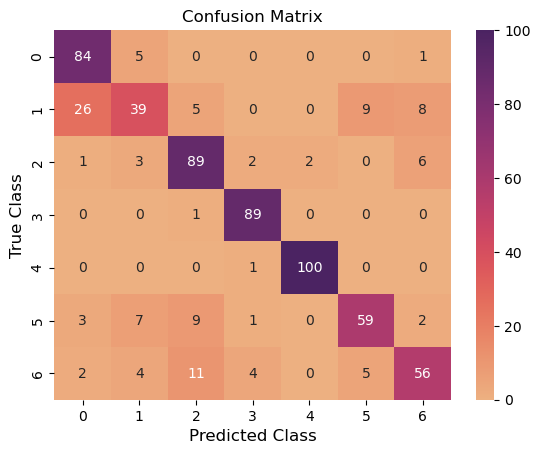

In [127]:
ans = sns.heatmap(cm , cmap = 'flare', annot = True , fmt = 'd')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class' , fontsize = 12)
plt.title('Confusion Matrix' , fontsize = 12)

plt.show()